In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# plt.rcParams.update({'font.family': 'sans-serif', 'font.size': 12})

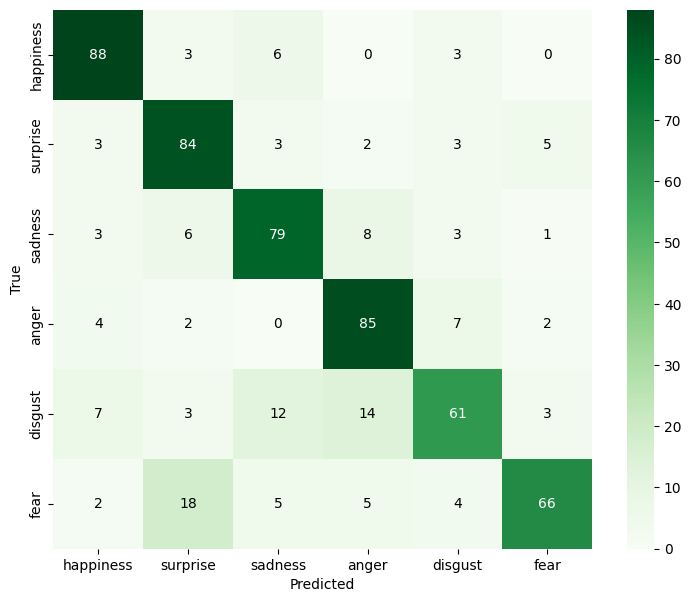

In [7]:
df = pd.read_csv('classification_scores_valid.csv') # change here!!!
class_names = ['happiness', 'surprise', 'sadness', 'anger', 'disgust', 'fear']
df['true'] = df['filepath'].apply(lambda x: x.split('_')[2].split('.')[0]) # change here!!! 
df['predicted'] = df[class_names].idxmax(axis=1)

confusion_matrix = pd.crosstab(df['true'], df['predicted'], rownames=['True'], colnames=['Predicted'])
confusion_matrix = confusion_matrix.reindex(index=class_names, columns=class_names, fill_value=0)

plt.figure(figsize=(9, 7))
ax = sns.heatmap(confusion_matrix, fmt="d", cmap='Greens', square=True, cbar=True, annot_kws=None) # cmap= PiYG, Blues, BuPu, Greens, Oranges, YlGnBu, coolwarm
for i, row in enumerate(confusion_matrix.values):
    for j, val in enumerate(row):
        text_color = 'white' if i == j else 'black'
        ax.text(j+0.5, i+0.5, val, color=text_color, ha='center', va='center')

# for i, row in enumerate(confusion_matrix.values):
#     for j, val in enumerate(row):
#         ax.text(j+0.5, i+0.5, val, color='black', ha='center', va='center')

plt.savefig('matval.png', dpi=400, bbox_inches='tight', pad_inches=0.1)
plt.show()